In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [3]:
data=pd.read_csv("CarPrice.csv")

In [5]:
data.head()

,fuelType,length,height,cylinders,engine-size,hourse power,price
0,gas,168.8,48.8,four,130,111,13495
1,gas,168.8,48.8,four,130,111,16500
2,gas,171.2,52.4,six,152,154,16500
3,gas,176.6,54.3,four,109,102,13950
4,gas,176.6,54.3,five,136,115,17450


In [6]:
data.shape

(195, 7)

In [39]:
X1=data.iloc[:,:-6].values

In [40]:
X1

array([['gas'],
       ['gas'],
       ['gas'],
       ['gas'],
       ['gas'],
       ['gas'],
       ['gas'],
       ['gas'],
       ['gas'],
       ['gas'],
       ['gas'],
       ['gas'],
       ['gas'],
       ['gas'],
       ['gas'],
       ['gas'],
       ['gas'],
       ['gas'],
       ['gas'],
       ['gas'],
       ['gas'],
       ['gas'],
       ['gas'],
       ['gas'],
       ['gas'],
       ['gas'],
       ['gas'],
       ['gas'],
       ['gas'],
       ['gas'],
       ['gas'],
       ['gas'],
       ['gas'],
       ['gas'],
       ['gas'],
       ['gas'],
       ['gas'],
       ['gas'],
       ['gas'],
       ['gas'],
       ['gas'],
       ['gas'],
       ['gas'],
       ['gas'],
       ['gas'],
       ['gas'],
       ['gas'],
       ['gas'],
       ['gas'],
       ['gas'],
       ['gas'],
       ['gas'],
       ['gas'],
       ['gas'],
       ['gas'],
       ['gas'],
       ['diesel'],
       ['gas'],
       ['gas'],
       ['diesel'],
       ['diesel'],
       ['diesel

In [12]:
Y=data.iloc[:,6].values

In [13]:
Y

array([13495, 16500, 16500, 13950, 17450, 15250, 17710, 18920, 23875,
       16430, 16925, 20970, 21105, 24565, 30760, 41315, 36880,  5151,
        6295,  6575,  5572,  6377,  7957,  6229,  6692,  7609,  8558,
        8921, 12964,  6479,  6855,  5399,  6529,  7129,  7295,  7295,
        7895,  9095,  8845, 10295, 12945, 10345,  6785, 11048, 32250,
       35550, 36000,  5195,  6095,  6795,  6695,  7395,  8845,  8495,
       10595, 10245, 10795, 11245, 18280, 18344, 25552, 28248, 28176,
       31600, 34184, 35056, 40960, 45400, 16503,  5389,  6189,  6669,
        7689,  9959,  8499, 12629, 14869, 14489,  6989,  8189,  9279,
        9279,  5499,  7099,  6649,  6849,  7349,  7299,  7799,  7499,
        7999,  8249,  8949,  9549, 13499, 14399, 13499, 17199, 19699,
       18399, 11900, 13200, 12440, 13860, 15580, 16900, 16695, 17075,
       16630, 17950, 18150,  5572,  7957,  6229,  6692,  7609,  8921,
       12764, 22018, 32528, 34028, 37028, 11850, 12170, 15040, 15510,
       18150, 18620,

In [65]:
X1=data.iloc[::,1].values

In [66]:
X2

array([['gas', 168.8],
       ['gas', 168.8],
       ['gas', 171.2],
       ['gas', 176.6],
       ['gas', 176.6],
       ['gas', 177.3],
       ['gas', 192.7],
       ['gas', 192.7],
       ['gas', 192.7],
       ['gas', 176.8],
       ['gas', 176.8],
       ['gas', 176.8],
       ['gas', 176.8],
       ['gas', 189.0],
       ['gas', 189.0],
       ['gas', 193.8],
       ['gas', 197.0],
       ['gas', 141.1],
       ['gas', 155.9],
       ['gas', 158.8],
       ['gas', 157.3],
       ['gas', 157.3],
       ['gas', 157.3],
       ['gas', 157.3],
       ['gas', 157.3],
       ['gas', 157.3],
       ['gas', 157.3],
       ['gas', 174.6],
       ['gas', 173.2],
       ['gas', 144.6],
       ['gas', 144.6],
       ['gas', 150.0],
       ['gas', 150.0],
       ['gas', 150.0],
       ['gas', 163.4],
       ['gas', 157.1],
       ['gas', 167.5],
       ['gas', 167.5],
       ['gas', 175.4],
       ['gas', 175.4],
       ['gas', 175.4],
       ['gas', 169.1],
       ['gas', 170.7],
       ['ga

In [63]:
X3=data.iloc[::,2].values

In [64]:
X3

array([48.8, 48.8, 52.4, 54.3, 54.3, 53.1, 55.7, 55.7, 55.9, 54.3, 54.3,
       54.3, 54.3, 55.7, 55.7, 53.7, 56.3, 53.2, 52. , 52. , 50.8, 50.8,
       50.8, 50.6, 50.6, 50.6, 50.6, 59.8, 50.2, 50.8, 50.8, 52.6, 52.6,
       52.6, 54.5, 58.3, 53.3, 53.3, 54.1, 54.1, 54.1, 51. , 53.5, 51.4,
       52.8, 52.8, 47.8, 54.1, 54.1, 54.1, 54.1, 54.1, 53.7, 55.5, 53.7,
       55.5, 55.5, 55.5, 54.4, 54.4, 56.5, 58.7, 54.9, 56.3, 56.5, 50.8,
       56.7, 55.4, 54.8, 50.8, 50.8, 50.8, 50.8, 49.4, 49.4, 50.2, 50.2,
       50.2, 51.6, 51.6, 51.6, 51.6, 54.5, 54.5, 54.5, 54.5, 53.5, 54.5,
       53.3, 54.5, 53.5, 53.3, 54.7, 54.7, 55.1, 56.1, 55.1, 49.7, 49.7,
       49.7, 56.7, 56.7, 58.7, 58.7, 56.7, 56.7, 56.7, 58.7, 56.7, 56.7,
       56. , 50.8, 50.8, 50.6, 50.8, 50.8, 59.8, 50.2, 50.2, 51.6, 51.6,
       51.6, 56.1, 56.1, 56.1, 56.1, 56.1, 56.1, 53.7, 53.7, 55.7, 52.5,
       52.5, 52.5, 54.3, 54.3, 53. , 53. , 54.9, 54.9, 54.5, 54.5, 54.5,
       59.1, 59.1, 59.1, 53. , 52.8, 53. , 52.8, 53

In [24]:
X4=data.iloc[:,3].values

In [25]:
X4

array(['four', 'four', 'six', 'four', 'five', 'five', 'five', 'five',
       'five', 'four', 'four', 'six', 'six', 'six', 'six', 'six', 'six',
       'three', 'four', 'four', 'four', 'four', 'four', 'four', 'four',
       'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four',
       'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four',
       'four', 'four', 'four', 'six', 'six', 'twelve', 'four', 'four',
       'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four',
       'four', 'four', 'four', 'five', 'five', 'five', 'five', 'eight',
       'eight', 'eight', 'eight', 'four', 'four', 'four', 'four', 'four',
       'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four',
       'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four',
       'four', 'four', 'four', 'four', 'four', 'six', 'six', 'six', 'six',
       'six', 'six', 'four', 'four', 'four', 'four', 'four', 'four',
       'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four'

In [26]:
X5=data.iloc[:,4].values

In [27]:
X5

array([130, 130, 152, 109, 136, 136, 136, 136, 131, 108, 108, 164, 164,
       164, 209, 209, 209,  61,  90,  90,  90,  90,  98,  90,  90,  90,
        98, 122, 156,  92,  92,  79,  92,  92,  92,  92, 110, 110, 110,
       110, 110, 110, 111, 119, 258, 258, 326,  91,  91,  91,  91,  91,
       122, 122, 122, 122, 122, 122, 140, 134, 183, 183, 183, 183, 234,
       234, 308, 304, 140,  92,  92,  92,  98, 110, 122, 156, 156, 156,
       122, 122, 110, 110,  97, 103,  97,  97,  97,  97,  97,  97,  97,
        97, 120, 120, 181, 181, 181, 181, 181, 181, 120, 152, 120, 152,
       120, 152, 120, 152, 120, 152, 134,  90,  98,  90,  90,  98, 122,
       156, 151, 194, 194, 194, 121, 121, 121, 121, 121, 121,  97, 108,
       108, 108, 108, 108, 108, 108, 108, 108, 108, 108,  92,  92,  92,
        92,  92,  92,  98,  98, 110, 110,  98,  98,  98,  98,  98,  98,
        98, 146, 146, 146, 146, 146, 146, 122, 110, 122, 122, 122, 171,
       171, 171, 161,  97, 109,  97, 109, 109,  97, 109, 109, 10

In [28]:
X6=data.iloc[:,5].values

In [29]:
X6

array([111, 111, 154, 102, 115, 110, 110, 110, 140, 101, 101, 121, 121,
       121, 182, 182, 182,  48,  70,  70,  68,  68, 102,  68,  68,  68,
       102,  88, 145,  58,  76,  60,  76,  76,  76,  76,  86,  86,  86,
        86, 101, 100,  78,  90, 176, 176, 262,  68,  68,  68,  68,  68,
        84,  84,  84,  84,  64,  84, 120,  72, 123, 123, 123, 123, 155,
       155, 184, 184, 175,  68,  68,  68, 102, 116,  88, 145, 145, 145,
        88,  88, 116, 116,  69,  55,  69,  69,  69,  69,  69,  69,  69,
        69,  97,  97, 152, 152, 152, 160, 200, 160,  97,  95,  97,  95,
        95,  95,  95,  95,  97,  95, 142,  68, 102,  68,  68,  68,  88,
       145, 143, 207, 207, 207, 110, 110, 110, 110, 160, 160,  69,  73,
        73,  82,  82,  94,  82, 111,  82,  94,  82, 111,  62,  62,  62,
        62,  62,  62,  70,  70,  56,  56,  70,  70,  70,  70,  70, 112,
       112, 116, 116, 116, 116, 116, 116,  92,  73,  92,  92,  92, 161,
       161, 156, 156,  52,  85,  52,  85,  85,  68, 100,  90,  9

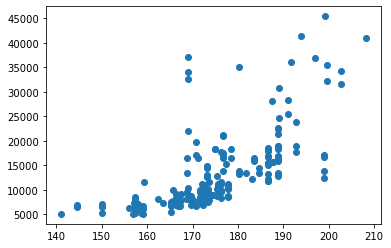

In [30]:
plt.scatter(X2,Y)

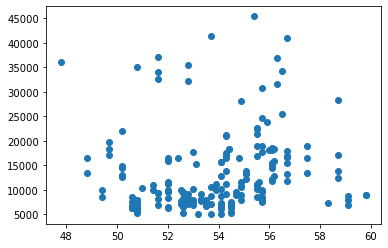

In [31]:
plt.scatter(X3,Y)

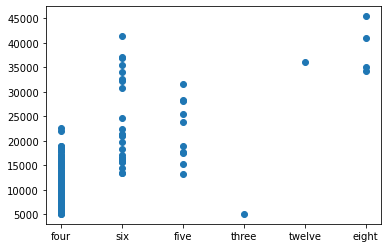

In [32]:
plt.scatter(X4,Y)

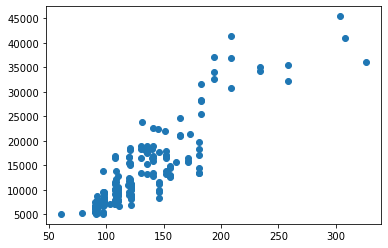

In [33]:
plt.scatter(X5,Y)

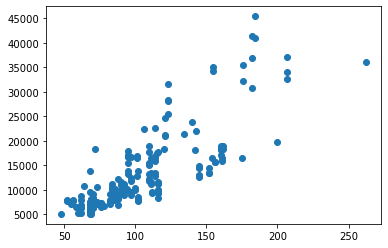

In [34]:
plt.scatter(X6,Y)

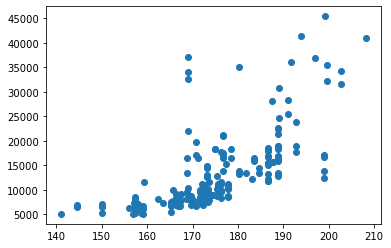

In [48]:
plt.scatter(X2,Y)

In [49]:
model = LinearRegression()

In [67]:
model.fit(X3,Y)

ValueError: Expected 2D array, got 1D array instead:
array=[48.8 48.8 52.4 54.3 54.3 53.1 55.7 55.7 55.9 54.3 54.3 54.3 54.3 55.7
 55.7 53.7 56.3 53.2 52.  52.  50.8 50.8 50.8 50.6 50.6 50.6 50.6 59.8
 50.2 50.8 50.8 52.6 52.6 52.6 54.5 58.3 53.3 53.3 54.1 54.1 54.1 51.
 53.5 51.4 52.8 52.8 47.8 54.1 54.1 54.1 54.1 54.1 53.7 55.5 53.7 55.5
 55.5 55.5 54.4 54.4 56.5 58.7 54.9 56.3 56.5 50.8 56.7 55.4 54.8 50.8
 50.8 50.8 50.8 49.4 49.4 50.2 50.2 50.2 51.6 51.6 51.6 51.6 54.5 54.5
 54.5 54.5 53.5 54.5 53.3 54.5 53.5 53.3 54.7 54.7 55.1 56.1 55.1 49.7
 49.7 49.7 56.7 56.7 58.7 58.7 56.7 56.7 56.7 58.7 56.7 56.7 56.  50.8
 50.8 50.6 50.8 50.8 59.8 50.2 50.2 51.6 51.6 51.6 56.1 56.1 56.1 56.1
 56.1 56.1 53.7 53.7 55.7 52.5 52.5 52.5 54.3 54.3 53.  53.  54.9 54.9
 54.5 54.5 54.5 59.1 59.1 59.1 53.  52.8 53.  52.8 53.  52.8 52.8 52.6
 52.6 52.6 52.6 52.  52.  52.  52.  52.  53.  54.9 54.9 53.9 54.9 53.9
 52.  52.  54.1 54.1 55.7 55.7 55.7 55.7 55.7 55.7 55.7 55.6 51.4 55.1
 55.1 55.1 56.2 57.5 56.2 57.5 56.2 57.5 55.5 55.5 55.5 55.5 55.5].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.